In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [2]:

feature_importance_path = "../data/processed/feature_importance.csv"
data_path = "../data/raw/train.csv"

# Load feature importance data
feature_importance = pd.read_csv(feature_importance_path, index_col=0)
print("Loaded feature importance data:")
print(feature_importance.head())

# Load raw dataset
data = pd.read_csv(data_path)
print("Loaded raw dataset:")
print(data.head())



Loaded feature importance data:
        importance    stddev   p_value  n  p99_high   p99_low
Sex       0.115152  0.006715  0.000001  5  0.128978  0.101325
Name      0.081481  0.012130  0.000057  5  0.106456  0.056507
Ticket    0.062626  0.006467  0.000013  5  0.075942  0.049311
Pclass    0.046914  0.006319  0.000039  5  0.059925  0.033903
Age       0.034119  0.005240  0.000065  5  0.044909  0.023329
Loaded raw dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel

In [7]:
# Preprocess data and select important features
important_features = feature_importance.index.tolist()
print("Important features:", important_features)
X = data[important_features]
y = data['Survived']

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(X.median())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Important features: ['Sex', 'Name', 'Ticket', 'Pclass', 'Age', 'SibSp', 'Parch', 'Cabin', 'Fare', 'Embarked', 'PassengerId']
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

Confusion Matrix:
[[94 11]
 [22 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

Confusion Matrix:
[[94 11]
 [22 52]]


In [8]:
# Train and evaluate Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))

# Train and evaluate SVM
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

# Compare all models
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

/home/vscode/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.98      0.74       105
           1       0.67      0.05      0.10        74

    accuracy                           0.60       179
   macro avg       0.63      0.52      0.42       179
weighted avg       0.62      0.60      0.48       179

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.

In [9]:
# Train and evaluate models without selecting important features
X_no_feature_selection = data.drop(columns=['Survived'])
X_no_feature_selection = pd.get_dummies(X_no_feature_selection, drop_first=True)
X_no_feature_selection = X_no_feature_selection.fillna(X_no_feature_selection.median())

# Split data into training and testing sets
X_train_no_fs, X_test_no_fs, y_train_no_fs, y_test_no_fs = train_test_split(X_no_feature_selection, y, test_size=0.2, random_state=42)

# Train and evaluate Decision Tree without feature selection
model_no_fs = DecisionTreeClassifier(random_state=42)
model_no_fs.fit(X_train_no_fs, y_train_no_fs)
y_pred_no_fs = model_no_fs.predict(X_test_no_fs)
print("Decision Tree (No Feature Selection) Classification Report:")
print(classification_report(y_test_no_fs, y_pred_no_fs))

# Train and evaluate Logistic Regression without feature selection
logistic_model_no_fs = LogisticRegression(random_state=42, max_iter=1000)
logistic_model_no_fs.fit(X_train_no_fs, y_train_no_fs)
logistic_pred_no_fs = logistic_model_no_fs.predict(X_test_no_fs)
print("Logistic Regression (No Feature Selection) Classification Report:")
print(classification_report(y_test_no_fs, logistic_pred_no_fs))

# Train and evaluate SVM without feature selection
svm_model_no_fs = SVC(random_state=42)
svm_model_no_fs.fit(X_train_no_fs, y_train_no_fs)
svm_pred_no_fs = svm_model_no_fs.predict(X_test_no_fs)
print("SVM (No Feature Selection) Classification Report:")
print(classification_report(y_test_no_fs, svm_pred_no_fs))

Decision Tree (No Feature Selection) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



/home/vscode/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (No Feature Selection) Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

SVM (No Feature Selection) Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.98      0.74       105
           1       0.67      0.05      0.10        74

    accuracy                           0.60       179
   macro avg       0.63      0.52      0.42       179
weighted avg       0.62      0.60      0.48       179

SVM (No Feature Selection) Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.98      0.74       105
           1       0.67      0.05      0.10        74

    accuracy    

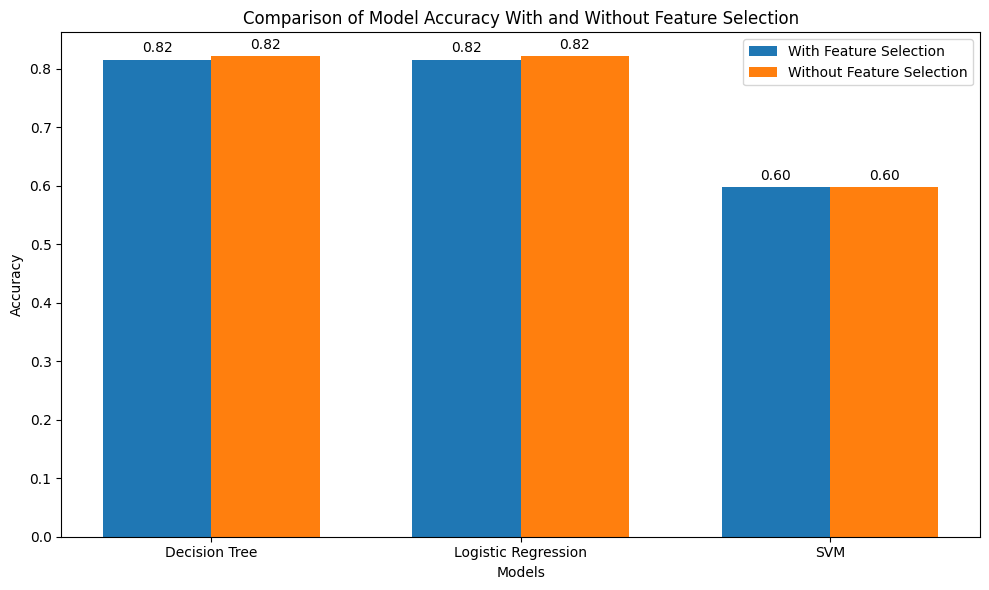

In [10]:
# Visualize comparison of models with and without feature selection
import matplotlib.pyplot as plt
import numpy as np

# Define model names and metrics
models = ['Decision Tree', 'Logistic Regression', 'SVM']
metrics_with_fs = [
    classification_report(y_test, y_pred, output_dict=True)['accuracy'],
    classification_report(y_test, logistic_pred, output_dict=True)['accuracy'],
    classification_report(y_test, svm_pred, output_dict=True)['accuracy']
 ]
metrics_without_fs = [
    classification_report(y_test_no_fs, y_pred_no_fs, output_dict=True)['accuracy'],
    classification_report(y_test_no_fs, logistic_pred_no_fs, output_dict=True)['accuracy'],
    classification_report(y_test_no_fs, svm_pred_no_fs, output_dict=True)['accuracy']
 ]

# Plot comparison
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, metrics_with_fs, width, label='With Feature Selection')
bar2 = ax.bar(x + width/2, metrics_without_fs, width, label='Without Feature Selection')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracy With and Without Feature Selection')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bars
for bar in bar1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()